In [19]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import sklearn.model_selection as model_selection
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [21]:
X = X.dropna(subset=['charges'])
y = y.dropna(subset=['death'])
df = pd.concat([X, y], axis=1)

# Drop NaN values from 'charges' and 'death' columns simultaneously
df_cleaned = df.dropna(subset=['charges', 'death'])
# Define features and target variable
selected_features = ['dzgroup', 'age', 'sex', 'num.co', 'scoma', 'charges', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls']

# Select only the columns of interest and drop rows with missing values
df_cleaned = df_cleaned[selected_features].dropna()

# Separate features (X) and target variable (y)
X = df_cleaned[selected_features[1:]]  # Exclude 'dzgroup' from features
y = df_cleaned['dzgroup']  # or 'dzclass' depending on your target variable

# Encode categorical variables 'sex' and 'race' using LabelEncoder
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['race'] = label_encoder.fit_transform(X['race'])

# Use label encoding for the target variable 'dzgroup'
y = label_encoder.fit_transform(df_cleaned['dzgroup'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict disease groups for test data
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5233644859813084
              precision    recall  f1-score   support

           0       0.53      0.81      0.64        26
           1       0.49      0.74      0.59        27
           2       0.50      0.05      0.10        19
           3       0.00      0.00      0.00         7
           4       0.43      0.50      0.46         6
           6       0.86      0.50      0.63        12
           7       0.56      0.50      0.53        10

    accuracy                           0.52       107
   macro avg       0.48      0.44      0.42       107
weighted avg       0.51      0.52      0.47       107



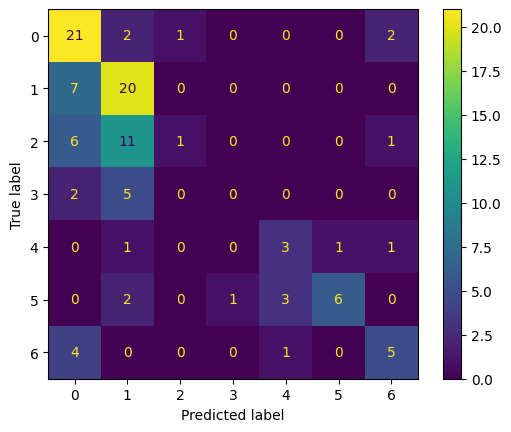

array([[21,  2,  1,  0,  0,  0,  2],
       [ 7, 20,  0,  0,  0,  0,  0],
       [ 6, 11,  1,  0,  0,  0,  1],
       [ 2,  5,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  3,  1,  1],
       [ 0,  2,  0,  1,  3,  6,  0],
       [ 4,  0,  0,  0,  1,  0,  5]])

In [22]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()
cm

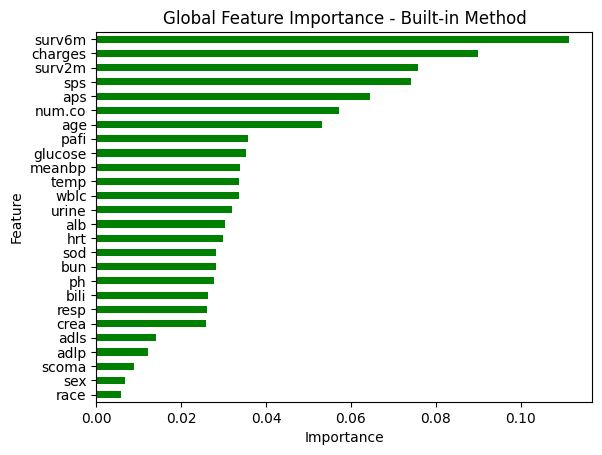

race       0.005688
sex        0.006724
scoma      0.008881
adlp       0.012053
adls       0.014148
crea       0.025865
resp       0.025974
bili       0.026303
ph         0.027673
bun        0.028185
sod        0.028197
hrt        0.029881
alb        0.030221
urine      0.032028
wblc       0.033597
temp       0.033656
meanbp     0.033778
glucose    0.035337
pafi       0.035625
age        0.053287
num.co     0.057287
aps        0.064435
sps        0.074053
surv2m     0.075874
charges    0.089890
surv6m     0.111359
dtype: float64

In [23]:
global_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")
plt.show()  # This line displays the plot


global_importances

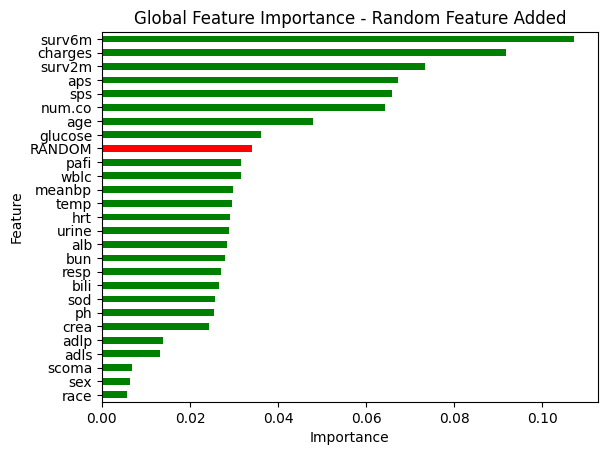

race       0.005800
sex        0.006415
scoma      0.006776
adls       0.013128
adlp       0.013949
crea       0.024270
ph         0.025474
sod        0.025635
bili       0.026685
resp       0.027051
bun        0.027868
alb        0.028317
urine      0.028781
hrt        0.029079
temp       0.029630
meanbp     0.029750
wblc       0.031613
pafi       0.031671
RANDOM     0.034121
glucose    0.036066
age        0.048048
num.co     0.064260
sps        0.065956
aps        0.067316
surv2m     0.073314
charges    0.091736
surv6m     0.107291
dtype: float64

In [25]:
# Create a random feature and add it to the training set
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

# Create and train Random Forest model
rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train)

# Get feature importances
global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)

# Plot feature importances
global_importances_random.plot.barh(color=['green' if index != 'RANDOM' else 'red' for index in global_importances_random.index])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Random Feature Added")
plt.show()

global_importances_random

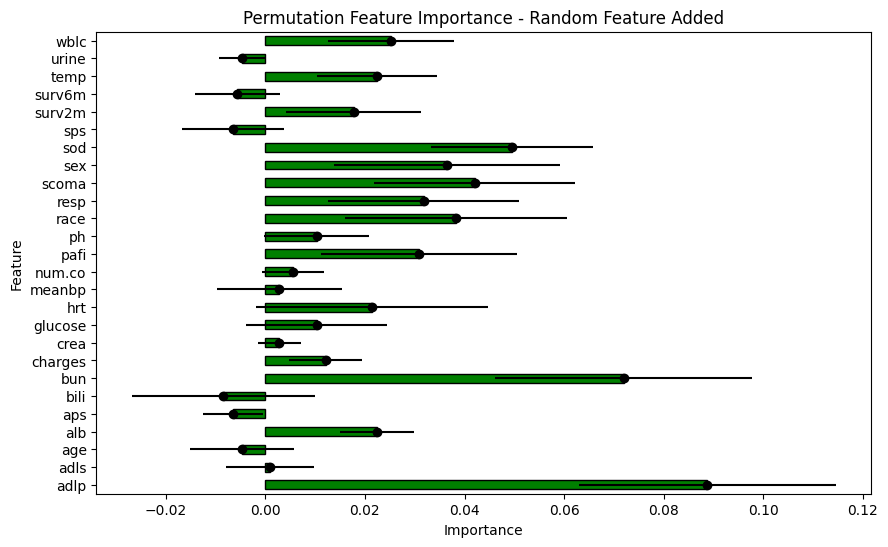

In [11]:
from sklearn.inspection import permutation_importance
import warnings

warnings.filterwarnings("ignore")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test.columns

permutation_feature_importance = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_index(ascending=True)

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
permutation_feature_importance['Importance'].plot.barh(color='green', edgecolor='black', ax=ax)

# Plot standard deviation as a line
plt.errorbar(x=permutation_feature_importance['Importance'], y=permutation_feature_importance.index, xerr=permutation_feature_importance['Std'], fmt='o', color='black')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance - Random Feature Added")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target variable
top_features = ['surv6m', 'charges', 'surv2m', 'sps']

import warnings

warnings.filterwarnings("ignore")

# Select only the columns of interest and drop rows with missing values
df_cleaned = df_cleaned[selected_features].dropna()

# Separate features (X) and target variable (y)
X = df_cleaned[selected_features[1:]]  # Exclude 'dzgroup' from features
y = df_cleaned['dzgroup']  # or 'dzclass' depending on your target variable

# Encode categorical variables 'sex' and 'race' using LabelEncoder
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['race'] = label_encoder.fit_transform(X['race'])

# Use label encoding for the target variable 'dzgroup'
y = label_encoder.fit_transform(df_cleaned['dzgroup'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, max_features = 10)
rf_classifier.fit(X_train, y_train)

# Predict disease groups for test data
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.4953271028037383
              precision    recall  f1-score   support

           0       0.49      0.85      0.62        26
           1       0.46      0.70      0.56        27
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         7
           4       0.43      0.50      0.46         6
           6       0.78      0.58      0.67        12
           7       0.50      0.20      0.29        10

    accuracy                           0.50       107
   macro avg       0.38      0.40      0.37       107
weighted avg       0.39      0.50      0.42       107



# Random Forest Hyperparameter Tuning 

In [13]:
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    # Add more hyperparameters to tune if needed
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_model_score = best_rf_model.score(X_test, y_test)
print("Best Model Accuracy:", best_model_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Model Accuracy: 0.5607476635514018


# Gradient Boosting Machines (GBM)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target variable
selected_features = ['dzgroup', 'age', 'sex', 'num.co', 'scoma', 'charges', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls']

# Select only the columns of interest and drop rows with missing values
df_cleaned = df_cleaned[selected_features].dropna()

# Separate features (X) and target variable (y)
X = df_cleaned[selected_features[1:]]  # Exclude 'dzgroup' from features
y = df_cleaned['dzgroup']  # or 'dzclass' depending on your target variable

# Encode categorical variables 'sex' and 'race' using LabelEncoder
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['race'] = label_encoder.fit_transform(X['race'])

# Use label encoding for the target variable 'dzgroup'
y = label_encoder.fit_transform(df_cleaned['dzgroup'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Initialize Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_gbm_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_gbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Best Model Accuracy: 0.5233644859813084
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.73      0.57        26
           1       0.51      0.70      0.59        27
           2       0.25      0.05      0.09        19
           3       0.00      0.00      0.00         7
           4       0.67      0.67      0.67         6
           5       0.00      0.00      0.00         0
           6       0.90      0.75      0.82        12
           7       0.67      0.40      0.50        10

    accuracy                           0.52       107
   macro avg       0.43      0.41      0.40       107
weighted avg       0.49      0.52      0.48       107



In [15]:
# Compare Accuracy
print("GBM Model Accuracy:", accuracy)
print("Random Forest Model Accuracy:", best_model_score)

# Compare Classification Reports
print("\nClassification Report for GBM Model:")
print(classification_report(y_test, y_pred))

print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, best_rf_model.predict(X_test)))

GBM Model Accuracy: 0.5233644859813084
Random Forest Model Accuracy: 0.5607476635514018

Classification Report for GBM Model:
              precision    recall  f1-score   support

           0       0.46      0.73      0.57        26
           1       0.51      0.70      0.59        27
           2       0.25      0.05      0.09        19
           3       0.00      0.00      0.00         7
           4       0.67      0.67      0.67         6
           5       0.00      0.00      0.00         0
           6       0.90      0.75      0.82        12
           7       0.67      0.40      0.50        10

    accuracy                           0.52       107
   macro avg       0.43      0.41      0.40       107
weighted avg       0.49      0.52      0.48       107


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        26
           1       0.50      0.81      0.62        27
           2

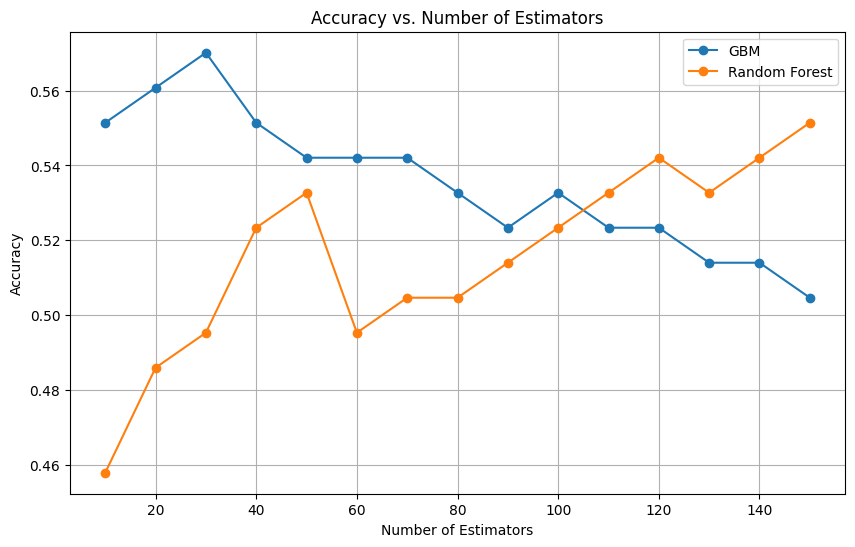

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Assuming you have loaded and preprocessed your dataset into X and y
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of estimators (trees) to try
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

# Train GBM models with different numbers of estimators and collect accuracy values
gbm_accuracies = []
for n_estimators in n_estimators_values:
    gbm_model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=5, learning_rate=0.1, random_state=42)
    gbm_model.fit(X_train, y_train)
    gbm_accuracy = accuracy_score(y_test, gbm_model.predict(X_test))
    gbm_accuracies.append(gbm_accuracy)

# Train Random Forest models with different numbers of estimators and collect accuracy values
rf_accuracies = []
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=None, min_samples_split=2, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
    rf_accuracies.append(rf_accuracy)

# Plot the accuracies for GBM and Random Forest
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, gbm_accuracies, marker='o', label='GBM')
plt.plot(n_estimators_values, rf_accuracies, marker='o', label='Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

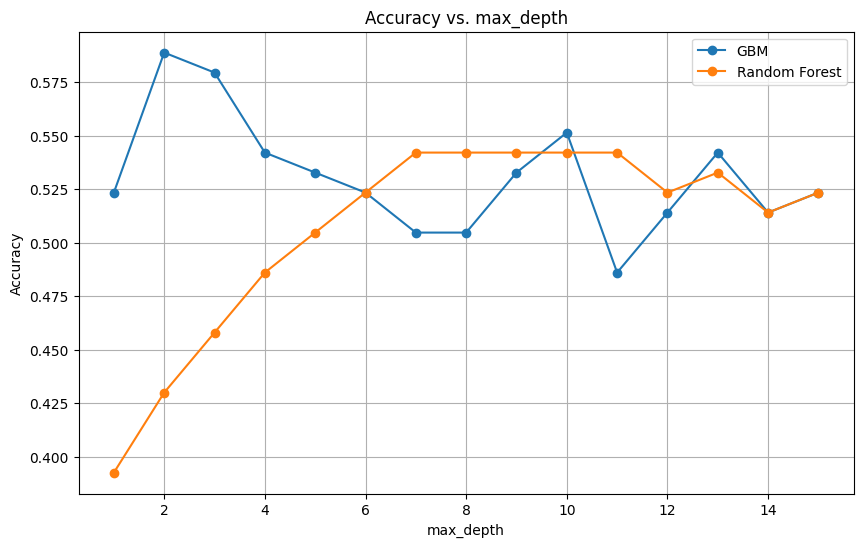

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Assuming you have loaded and preprocessed your dataset into X and y
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different max_depth values to try
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Train GBM models with different max_depth values and collect accuracy values
gbm_accuracies = []
for max_depth in max_depth_values:
    gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=max_depth, learning_rate=0.1, random_state=42)
    gbm_model.fit(X_train, y_train)
    gbm_accuracy = accuracy_score(y_test, gbm_model.predict(X_test))
    gbm_accuracies.append(gbm_accuracy)

# Train Random Forest models with different max_depth values and collect accuracy values
rf_accuracies = []
for max_depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, min_samples_split=2, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
    rf_accuracies.append(rf_accuracy)

# Plot the accuracies for GBM and Random Forest
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, gbm_accuracies, marker='o', label='GBM')
plt.plot(max_depth_values, rf_accuracies, marker='o', label='Random Forest')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
gbm_accuracies

[0.5233644859813084,
 0.5887850467289719,
 0.5794392523364486,
 0.5420560747663551,
 0.5327102803738317,
 0.5233644859813084,
 0.5046728971962616,
 0.5046728971962616,
 0.5327102803738317,
 0.5514018691588785,
 0.48598130841121495,
 0.514018691588785,
 0.5420560747663551,
 0.514018691588785,
 0.5233644859813084]

In [27]:
rf_accuracies

[0.3925233644859813,
 0.42990654205607476,
 0.45794392523364486,
 0.48598130841121495,
 0.5046728971962616,
 0.5233644859813084,
 0.5420560747663551,
 0.5420560747663551,
 0.5420560747663551,
 0.5420560747663551,
 0.5420560747663551,
 0.5233644859813084,
 0.5327102803738317,
 0.514018691588785,
 0.5233644859813084]